In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import datasets
import numpy as np
import random
import math

def k_means (data, k):
    instances = data.shape[0]
    labels = np.ones((instances, 1))
    us = assign_centroids(data, k) 
    centroids = np.array(us)
    for i in range(10):
        labels = assignment(data, us, labels, k)
        if empty(labels, k):
            return k_means(data, k)

        us = update(data, labels, us, k)
        centroids = np.vstack((centroids, us))
    return labels


def assign_centroids(data, k):
    attributes = data.shape[1]
    us = np.ones((1, attributes))
    
    for i in range(k):
        index = random.randint(0, len(data) - 1)
        u_new = np.array(data[index])
        us = np.vstack((us, u_new))
        data = np.delete(data, index, 0)
    return us[1:]

def assignment(data, us, labels, k):
    d = lambda p1, p2: math.sqrt(sum((p2 - p1)**2)) # distance function

    for i in range(len(data)):
        point = data[i]
        distances = [d(point, us[j]) for j in range(k)]
        min_distance = min(distances)
        cluster = distances.index(min_distance)
        labels[i] = cluster     
    return labels

def update(data, labels, us, k):
    counters = {} 
    
    for i in range(k):
        counters[i] = 0
    for i in range(len(labels)):
        cluster = int(labels[i])
        us[cluster] = np.add(us[cluster], data[i])
        counters[cluster] += 1
    for i in range(k):
        us[i] = us[i] / counters[i]
    return us

def empty(labels, k):
    for i in range(k):
        count = 0
        for j in range(len(labels)):
            if labels[j] == i:
                count += 1
        if count == 0:
            return True
    return False

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


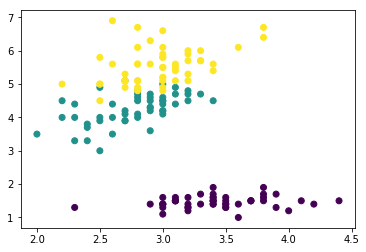

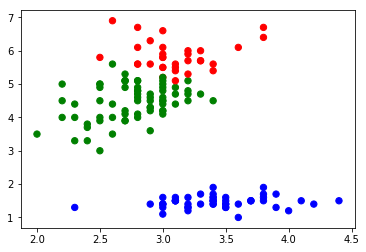

In [2]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])
plt.scatter(X_iris[:,1],X_iris[:,2],c=y_iris)
plt.show()

colormap = np.array(['red', 'green', 'blue'])

labels = k_means(iris.data, 3)
labels = [int(i) for i in labels]
plt.scatter(X_iris[:,1],X_iris[:,2], c=colormap[labels], s=40)
plt.show()

In [3]:
dataset1 =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv", 
                       sep=",", header=None, dtype=int, skiprows = [0])
dataset2 =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.data", 
                        sep=",", header=None, skiprows = [0])
dataset3 =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt", 
                        sep=",", header=None, skiprows = 430000)

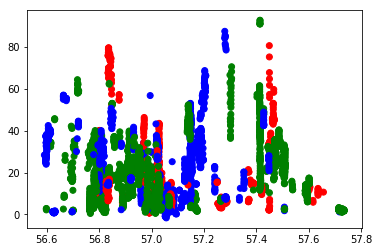

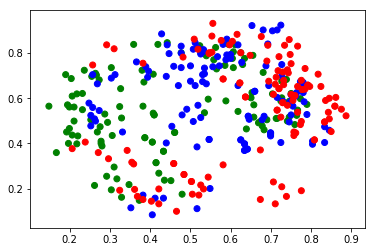

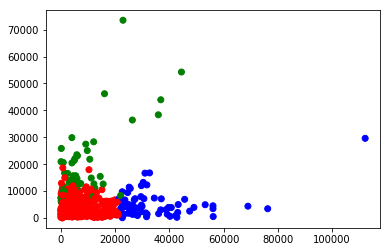

In [4]:
colormap = np.array(['red', 'green', 'blue'])

labels = k_means(np.array(dataset3), 3)
labels = [int(i) for i in labels]
plt.scatter(dataset3[2],dataset3[3], c=colormap[labels])
plt.show()

labels = k_means(np.array(dataset2), 3)
labels = [int(i) for i in labels]
plt.scatter(dataset2[1],dataset2[2], c=colormap[labels])
plt.show()

labels = k_means(np.array(dataset1), 3)
labels = [int(i) for i in labels]
plt.scatter(dataset1[2],dataset1[3], c=colormap[labels])
plt.show()